In [ ]:
import pandas as pd
# Set option to display all rows
pd.set_option('display.max_rows', None)

df = pd.read_csv('/content/combined_data.csv')

print(df.head())


   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...


In [ ]:
df.shape

(83448, 2)

In [ ]:
df.isnull().sum()

,0
label,0
text,0


In [ ]:
df1 = pd.read_csv('/content/final_features.csv')

In [ ]:
df1.head()

,Unnamed: 0,id,Length-of-Email,URLs-in-a-Email,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number of capitalized words,...,semantic,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Spam lexicon,User features,Polarity,Subjective,class
0,0,1,0.0239,0.0003,0.0777,0.0115,0.0,0.06,0.0001,0.0000,...,0.2847,0.0968,0.719,0.2810,0.9959,0.4000,0,0.1722,0.183625,0
1,1,2,0.0019,0.0003,0.0000,0.0022,0.0,0.02,0.0000,0.0000,...,0.2338,0.0000,0.876,0.1692,0.4767,0.0000,0,0.1572,0.508423,0
2,2,3,0.0154,0.0006,0.0564,0.0079,0.0,0.06,0.0001,0.0000,...,0.2577,0.0232,0.928,0.0750,0.7967,0.0000,0,0.0398,0.462447,0
3,3,4,0.0007,0.0003,0.0000,0.0008,0.0,0.00,0.0000,0.0000,...,0.2860,0.0000,0.538,0.6303,0.8568,0.0667,0,0.6183,0.007581,0
4,4,5,0.0023,0.0006,0.0015,0.0020,0.0,0.06,0.0000,0.0024,...,0.2766,0.0000,0.884,0.1583,0.6947,0.0667,1,0.1463,0.143069,0


In [ ]:
df1.columns

Index(['Unnamed: 0', 'id', 'Length-of-Email', 'URLs-in-a-Email',
       'Repititive-Words-in-a-Email', 'Uinque-Words-in-a-Email',
       'Quoted-text-in-a-Email', 'Question-Marks-in-a-Email',
       'Number of co-occuring words', 'Number of capitalized words',
       'Number-of-noun', 'semantic', 'Neg-Sentiment', 'Neu-Sentiment',
       'Pos-Sentiment', 'Comp-Sentiment', 'Spam lexicon', 'User features',
       'Polarity', 'Subjective', 'class'],
      dtype='object')

In [ ]:
final_df=df.copy()

In [ ]:
import pandas as pd
import re
from collections import Counter
import nltk

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Example spam lexicon (you can add more words based on your specific use case)
spam_lexicons = set([
    # Financial-related terms
    'free', 'winner', 'win', 'prize', 'cash', 'urgent', 'congratulations',
    'claim', 'credit', 'debt', 'discount', 'clearance', 'bargain', 'save',
    'cheap', 'guarantee', 'money', 'investment', 'earn', 'income', 'profit',
    'rich', 'fortune', 'million', 'billion', 'dollars', 'revenue', 'payment',

    # Persuasive phrases
    'act now', 'apply now', 'buy now', 'call now', 'click here', 'limited time',
    'offer expires', 'order now', 'please read', 'risk-free', 'special promotion',
    'this won’t last', 'urgent', 'exclusive offer', 'once in a lifetime',
    'instant access', 'do it today', 'don’t delete', 'offer ends', 'final notice',

    # Personal-related terms
    'friend', 'dear', 'partner', 'family', 'important', 'invitation',
    'attention', 'selected', 'member', 'winner', 'amazing', 'surprise',
    'gift', 'loyal', 'lucky', 'vacation', 'holiday', 'win', 'visit',

    # Legal-related terms
    'law', 'legal', 'banned', 'illegal', 'violation', 'urgent', 'immediate action',
    'penalty', 'court', 'attorney', 'lawyer', 'lawsuit', 'tax', 'IRS', 'federal',
    'regulation', 'compliance', 'subpoena', 'judgment', 'settlement',

    # Technical-related terms
    'password', 'account', 'security', 'login', 'verify', 'verification', 'confirm',
    'account update', 'limited access', 'account alert', 'unauthorized', 'compromise',
    'system', 'database', 'phishing', 'hack', 'breach', 'malware', 'spyware',
    'virus', 'install', 'download', 'software', 'update', 'scan', 'safe', 'trusted',

    # Medical and health-related terms
    'medicine', 'prescription', 'pharmacy', 'doctor', 'health', 'cure', 'treatment',
    'drug', 'pill', 'weight loss', 'fat burning', 'anti-aging', 'miracle', 'remedy',
    'supplement', 'herbal', 'detox', 'disease', 'cancer', 'diabetes', 'allergy',

    # Miscellaneous
    'adult', 'nude', 'sex', 'XXX', 'porn', 'casino', 'gambling', 'betting', 'lottery',
    'jackpot', 'luxury', 'brand new', 'limited edition', 'celebrity', 'fame', 'fortune',
    'confidential', 'private', 'secret', 'hidden', 'mystery', 'solution', 'bonus',
    'gift card', 'voucher', 'rewards', 'prizes', 'cashback', 'sweepstakes'
])

# Function to count spam lexicons
def count_spam_lexicons(text, spam_lexicons):
    words = text.lower().split()
    return sum(1 for word in words if word in spam_lexicons)

# Function to count words with specific POS tags (e.g., nouns)
def count_pos_tags(text, pos_tag):
    words = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    return sum(1 for word, tag in tagged_words if tag.startswith(pos_tag))

# Function to extract features from text
def extract_features(text):
    features = {}

    # Length of email
    features['Length-of-Email'] = len(text)

    # Count URLs in email
    features['URLs-in-a-Email'] = len(re.findall(r'http[s]?://\S+', text))

    # Count capitalized words in email (before converting to lowercase)
    words = text.split()
    features['Number of capitalized words'] = sum(1 for word in words if word.isupper())

    # Convert text to lowercase for further processing
    words = text.lower().split()

    # Count repetitive words in email
    word_counts = Counter(words)
    features['Repititive-Words-in-a-Email'] = sum(1 for word, count in word_counts.items() if count > 1)

    # Count unique words in email
    features['Uinque-Words-in-a-Email'] = len(set(words))

    # Count quoted text in email (assuming quoted text starts with ">")
    features['Quoted-text-in-a-Email'] = len(re.findall(r'^>.*$', text, re.MULTILINE))

    # Count question marks in email
    features['Question-Marks-in-a-Email'] = text.count('?')

    # Count co-occurring words (words appearing next to each other, like bigrams)
    bigrams = list(nltk.bigrams(words))
    features['Number of co-occuring words'] = len(bigrams)

    # Count the number of nouns in email
    features['Number-of-noun'] = count_pos_tags(text, 'NN')

    # Count spam lexicons in email
    features['Spam lexicon'] = count_spam_lexicons(text, spam_lexicons)

    return features

# Apply feature extraction to the DataFrame
df_features = df['text'].apply(extract_features).apply(pd.Series)

# Concatenate the features with the original DataFrame
final_csv = pd.concat([df, df_features], axis=1)
final_csv.head()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,label,text,Length-of-Email,URLs-in-a-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon
0,1,ounce feather bowl hummingbird opec moment ala...,148,0,0,0,20,0,0,19,17,0
1,1,wulvob get your medircations online qnb ikud v...,808,0,0,5,73,0,0,102,41,1
2,0,computer connection from cnn com wednesday es...,2235,0,0,61,180,0,0,336,156,3
3,1,university degree obtain a prosperous future m...,592,0,0,5,60,0,0,75,33,1
4,0,thanks for all your answers guys i know i shou...,1362,0,0,38,123,0,0,221,106,0


In [ ]:
final_csv.sample(5)

,label,text,Length-of-Email,URLs-in-a-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon
74236,1,for women ages 13 to 60 plus . . . .\nas seen ...,363,0,0,9,53,0,0,75,20,0
49007,0,daniel hulme writes on fri jun escapenumber es...,335,0,0,4,34,0,0,46,16,0
10628,0,rick and sally\ni told the scholarship winners...,3145,0,0,101,256,0,2,653,238,1
45114,1,hallo\nich danke dir fir deine liebe mail ich ...,1075,0,0,30,133,0,1,234,118,0
78015,0,hi everyone when i was using cv lm daag i foun...,1486,0,0,47,139,0,0,253,127,0


In [ ]:
final_csv.to_csv('1stpart.csv')

In [ ]:
final_csv['URLs-in-a-Email'].value_counts()

,count
URLs-in-a-Email,
0,83448


In [ ]:
final_csv['Number of capitalized words'].value_counts()

,count
Number of capitalized words,
0,83444
1,2
3,1
2,1


In [ ]:
# List of columns to drop
columns_to_drop = ['text', 'URLs-in-a-Email']

# Drop the columns from the DataFrame
final_csv = final_csv.drop(columns=columns_to_drop)


In [ ]:
final_csv.to_csv('1stprt1.csv')

In [ ]:
final_csv.head()

,label,Length-of-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon
0,1,148,0,0,20,0,0,19,17,0
1,1,808,0,5,73,0,0,102,41,1
2,0,2235,0,61,180,0,0,336,156,3
3,1,592,0,5,60,0,0,75,33,1
4,0,1362,0,38,123,0,0,221,106,0


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply the preprocess_text function to the 'email_text' column
df['Cleaned_Text'] = df['text'].apply(preprocess_text)

In [ ]:
df.to_csv("new3.csv")

In [ ]:
df['Cleaned_Text'].head()

,Cleaned_Text
0,ounce feather bowl hummingbird opec moment ala...
1,wulvob get medircations online qnb ikud viagra...
2,computer connection cnn com wednesday escapenu...
3,university degree obtain prosperous future mon...
4,thanks answer guy know checked rsync manual wo...


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate semantic and sentiment features
def compute_semantic_features(text):
    features = {}

    # VADER sentiment analysis
    sentiment_scores = sia.polarity_scores(text)
    features['Neg-Sentiment'] = sentiment_scores['neg']
    features['Neu-Sentiment'] = sentiment_scores['neu']
    features['Pos-Sentiment'] = sentiment_scores['pos']
    features['Comp-Sentiment'] = sentiment_scores['compound']

    # TextBlob sentiment analysis
    blob = TextBlob(text)
    features['Polarity'] = blob.sentiment.polarity
    features['Subjective'] = blob.sentiment.subjectivity

    return features

# Example usage with a DataFrame
# Assume `df` is your DataFrame containing the email text in a column named `Cleaned_Text`
df_semantic_features = df['Cleaned_Text'].apply(compute_semantic_features).apply(pd.Series)

# Concatenate the features with the original DataFrame
df = pd.concat([df, df_semantic_features], axis=1)

# Save the DataFrame to a CSV file
df.to_csv('email_with_semantic_features.csv', index=False)

print("Semantic and sentiment features extracted and saved to email_with_semantic_features.csv")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Semantic and sentiment features extracted and saved to email_with_semantic_features.csv


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from textblob import TextBlob

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# Load the cleaned dataset
df = pd.read_csv('/content/clean.csv')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Define a simple spam lexicon
spam_lexicon = set([
    'free', 'win', 'winner', 'prize', 'cash', 'guarantee', 'credit', 'urgent',
    'limited', 'offer', 'click', 'buy', 'cheap', 'order', 'promo', 'congratulations'
])



# Function to extract features from text
def extract_features(email):
    text = email['Cleaned_Text']
    features = {}

    # 1. Length-of-Email
    features['Length-of-Email'] = len(text)

    # 2. URLs-in-a-Email
    features['URLs-in-a-Email'] = len(re.findall(r'http\S+|www\S+', text))

    # 3. Repetitive-Words-in-a-Email
    words = word_tokenize(text)
    word_counts = Counter(words)
    repetitive_words = [word for word, count in word_counts.items() if count > 1]
    features['Repetitive-Words-in-a-Email'] = len(repetitive_words)

    # 4. Unique-Words-in-a-Email
    unique_words = set(words)
    features['Unique-Words-in-a-Email'] = len(unique_words)

    # 5. Quoted-text-in-a-Email
    features['Quoted-text-in-a-Email'] = len(re.findall(r'\"[^\"]*\"', text))

    # 6. Question-Marks-in-a-Email
    features['Question-Marks-in-a-Email'] = text.count('?')

    # 7. Number of co-occurring words
    features['Number of co-occurring words'] = len([word for word in words if words.count(word) > 1])

    # 8. Number of capitalized words
    features['Number of capitalized words'] = len([word for word in words if word.isupper()])

    # 9. Number-of-noun
    pos_tags = pos_tag(words)
    nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
    features['Number-of-noun'] = len(nouns)

    # 10. Semantic analysis - Placeholder
    features['semantic'] = 'N/A'  # Replace with actual semantic analysis if needed

    # 11-14. Sentiment Analysis
    sentiment = sia.polarity_scores(text)
    features['Neg-Sentiment'] = sentiment['neg']
    features['Neu-Sentiment'] = sentiment['neu']
    features['Pos-Sentiment'] = sentiment['pos']
    features['Comp-Sentiment'] = sentiment['compound']

    # 15. Spam lexicon analysis
    spam_words = [word for word in words if word in spam_lexicon]
    features['Spam lexicon'] = len(spam_words)



    # 17. Polarity
    polarity = TextBlob(text).sentiment.polarity
    features['Polarity'] = polarity

    # 18. Subjectivity
    subjectivity = TextBlob(text).sentiment.subjectivity
    features['Subjective'] = subjectivity

    return features

# Apply the feature extraction function to each email
features_df = df.apply(extract_features, axis=1).apply(pd.Series)

# Combine the features with the original DataFrame
result_df = pd.concat([df, features_df], axis=1)

# Save the result to a new CSV file
result_df.to_csv('extracted_features_emails_with_spam_user.csv', index=False)

print("Features extracted and saved to 'extracted_features_emails_with_spam_user.csv'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Features extracted and saved to 'extracted_features_emails_with_spam_user.csv'


In [ ]:
df=result_df.copy()


In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'Cleaned_Text', 'Length-of-Email',
       'URLs-in-a-Email', 'Repetitive-Words-in-a-Email',
       'Unique-Words-in-a-Email', 'Quoted-text-in-a-Email',
       'Question-Marks-in-a-Email', 'Number of co-occurring words',
       'Number of capitalized words', 'Number-of-noun', 'semantic',
       'Neg-Sentiment', 'Neu-Sentiment', 'Pos-Sentiment', 'Comp-Sentiment',
       'Spam lexicon', 'Polarity', 'Subjective'],
      dtype='object')

In [ ]:
df['label'].value_counts()

,count
label,
1,43891
0,39530


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
len(df.columns)

20

In [ ]:
df.shape

(83421, 20)

In [ ]:
df.head()

,label,text,Cleaned_Text,Length-of-Email,URLs-in-a-Email,Repetitive-Words-in-a-Email,Unique-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occurring words,Number of capitalized words,Number-of-noun,semantic,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Spam lexicon,Polarity,Subjective
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,148,0,0,20,0,0,0,0,17,N/A,0.108,0.892,0.000,-0.3182,0,-0.600000,1.000000
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...,711,0,1,53,0,0,27,0,41,N/A,0.076,0.890,0.034,-0.3612,0,-0.012500,0.375000
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...,1962,0,48,143,0,0,180,0,162,N/A,0.000,0.872,0.128,0.9873,5,0.151120,0.308964
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...,499,0,2,44,0,0,13,0,26,N/A,0.000,0.862,0.138,0.8074,0,0.033333,0.075000
4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...,1079,0,27,93,0,0,90,0,71,N/A,0.205,0.749,0.046,-0.9538,0,-0.023958,0.591319


In [ ]:
df.to_csv("final.csv")

In [ ]:
df.drop("semantic",axis=1,inplace=True)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/final.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,Cleaned_Text,Length-of-Email,URLs-in-a-Email,Repetitive-Words-in-a-Email,Unique-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,...,Number of capitalized words,Number-of-noun,semantic,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Spam lexicon,Polarity,Subjective
0,0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,148,0,0,20,0,0,...,0,17,NaN,0.108,0.892,0.000,-0.3182,0,-0.600000,1.000000
1,1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...,711,0,1,53,0,0,...,0,41,NaN,0.076,0.890,0.034,-0.3612,0,-0.012500,0.375000
2,2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...,1962,0,48,143,0,0,...,0,162,NaN,0.000,0.872,0.128,0.9873,5,0.151120,0.308964
3,3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...,499,0,2,44,0,0,...,0,26,NaN,0.000,0.862,0.138,0.8074,0,0.033333,0.075000
4,4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...,1079,0,27,93,0,0,...,0,71,NaN,0.205,0.749,0.046,-0.9538,0,-0.023958,0.591319


In [ ]:
df = df.drop(columns=['text', 'Cleaned_Text',	'Unnamed: 0', 'semantic'])

In [ ]:
len(df.columns)

17

In [ ]:
df.head()

,label,Length-of-Email,URLs-in-a-Email,Repetitive-Words-in-a-Email,Unique-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occurring words,Number of capitalized words,Number-of-noun,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Spam lexicon,Polarity,Subjective
0,1,148,0,0,20,0,0,0,0,17,0.108,0.892,0.000,-0.3182,0,-0.600000,1.000000
1,1,711,0,1,53,0,0,27,0,41,0.076,0.890,0.034,-0.3612,0,-0.012500,0.375000
2,0,1962,0,48,143,0,0,180,0,162,0.000,0.872,0.128,0.9873,5,0.151120,0.308964
3,1,499,0,2,44,0,0,13,0,26,0.000,0.862,0.138,0.8074,0,0.033333,0.075000
4,0,1079,0,27,93,0,0,90,0,71,0.205,0.749,0.046,-0.9538,0,-0.023958,0.591319


In [ ]:
import pandas as pd
df=pd.read_csv('/content/1stprt1.csv')
df1=pd.read_csv('/content/email_with_semantic_features.csv')
df2=pd.read_csv('/content/new3.csv')

In [ ]:
df.head()

,Unnamed: 0,label,Length-of-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon
0,0,1,148,0,0,20,0,0,19,17,0
1,1,1,808,0,5,73,0,0,102,41,1
2,2,0,2235,0,61,180,0,0,336,156,3
3,3,1,592,0,5,60,0,0,75,33,1
4,4,0,1362,0,38,123,0,0,221,106,0


In [ ]:
df.drop(columns=['Unnamed: 0','label'], axis=1,inplace=True)

In [ ]:
df.columns

Index(['Length-of-Email', 'Number of capitalized words',
       'Repititive-Words-in-a-Email', 'Uinque-Words-in-a-Email',
       'Quoted-text-in-a-Email', 'Question-Marks-in-a-Email',
       'Number of co-occuring words', 'Number-of-noun', 'Spam lexicon'],
      dtype='object')

In [ ]:
df1.head()

,label,text,Cleaned_Text,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Polarity,Subjective
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...,0.108,0.892,0.000,-0.3182,-0.600000,1.000000
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...,0.076,0.890,0.034,-0.3612,-0.012500,0.375000
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...,0.000,0.872,0.128,0.9873,0.151120,0.308964
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...,0.000,0.862,0.138,0.8074,0.033333,0.075000
4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...,0.205,0.749,0.046,-0.9538,-0.023958,0.591319


In [ ]:
df1.drop(columns=['text','Cleaned_Text'], axis=1,inplace=True)

In [ ]:
df1.columns

Index(['label', 'Neg-Sentiment', 'Neu-Sentiment', 'Pos-Sentiment',
       'Comp-Sentiment', 'Polarity', 'Subjective'],
      dtype='object')

In [ ]:
df2.head()

,Unnamed: 0,label,text,Cleaned_Text
0,0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...


In [ ]:
result = pd.concat([df, df1], axis=1)


In [ ]:
result.head()

,Length-of-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon,label,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Polarity,Subjective
0,148,0,0,20,0,0,19,17,0,1,0.108,0.892,0.000,-0.3182,-0.600000,1.000000
1,808,0,5,73,0,0,102,41,1,1,0.076,0.890,0.034,-0.3612,-0.012500,0.375000
2,2235,0,61,180,0,0,336,156,3,0,0.000,0.872,0.128,0.9873,0.151120,0.308964
3,592,0,5,60,0,0,75,33,1,1,0.000,0.862,0.138,0.8074,0.033333,0.075000
4,1362,0,38,123,0,0,221,106,0,0,0.205,0.749,0.046,-0.9538,-0.023958,0.591319


In [ ]:
result.columns

Index(['Length-of-Email', 'Number of capitalized words',
       'Repititive-Words-in-a-Email', 'Uinque-Words-in-a-Email',
       'Quoted-text-in-a-Email', 'Question-Marks-in-a-Email',
       'Number of co-occuring words', 'Number-of-noun', 'Spam lexicon',
       'label', 'Neg-Sentiment', 'Neu-Sentiment', 'Pos-Sentiment',
       'Comp-Sentiment', 'Polarity', 'Subjective'],
      dtype='object')

In [ ]:
result.isnull().sum()

,0
Length-of-Email,0
Number of capitalized words,0
Repititive-Words-in-a-Email,0
Uinque-Words-in-a-Email,0
Quoted-text-in-a-Email,0
Question-Marks-in-a-Email,0
Number of co-occuring words,0
Number-of-noun,0
Spam lexicon,0
label,0


In [ ]:
len(result.columns)

16

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
# List of columns you want to normalize
columns_to_normalize = ['Length-of-Email', 'Number of capitalized words',
       'Repititive-Words-in-a-Email', 'Uinque-Words-in-a-Email',
       'Quoted-text-in-a-Email', 'Question-Marks-in-a-Email',
       'Number of co-occuring words', 'Number-of-noun', 'Spam lexicon']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
result[columns_to_normalize] = scaler.fit_transform(result[columns_to_normalize])

# Display the DataFrame with normalized columns
print(result)


       Length-of-Email  Number of capitalized words  \
0             0.000246                          0.0   
1             0.001348                          0.0   
2             0.003731                          0.0   
3             0.000987                          0.0   
4             0.002273                          0.0   
...                ...                          ...   
83443         0.004323                          0.0   
83444         0.001027                          0.0   
83445         0.000890                          0.0   
83446         0.003528                          0.0   
83447         0.000371                          0.0   

       Repititive-Words-in-a-Email  Uinque-Words-in-a-Email  \
0                         0.000000                 0.003667   
1                         0.001869                 0.013897   
2                         0.022804                 0.034549   
3                         0.001869                 0.011388   
4                       

In [ ]:
result.head(2
            )

,Length-of-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon,label,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Polarity,Subjective
0,0.000246,0.0,0.000000,0.003667,0.0,0.0,0.000186,0.000234,0.000000,1,0.108,0.892,0.000,-0.3182,-0.6000,1.000
1,0.001348,0.0,0.001869,0.013897,0.0,0.0,0.001000,0.000565,0.001225,1,0.076,0.890,0.034,-0.3612,-0.0125,0.375


In [ ]:
result.to_csv('finalFeatures.csv')

In [ ]:
df=result.copy()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/finalFeatures.csv')
df.head(1)

,Unnamed: 0,Length-of-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon,label,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Polarity,Subjective
0,0,0.000246,0.0,0.0,0.003667,0.0,0.0,0.000186,0.000234,0.0,1,0.108,0.892,0.0,-0.3182,-0.6,1.0


improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.7090 - loss: 0.5748 - val_accuracy: 0.7994 - val_loss: 0.4349
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7906 - loss: 0.4594 - val_accuracy: 0.8095 - val_loss: 0.4351
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8033 - loss: 0.4412 - val_accuracy: 0.8158 - val_loss: 0.4107
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8105 - loss: 0.4280 - val_accuracy: 0.8256 - val_loss: 0.3931
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8123 - loss: 0.4219 - val_accuracy: 0.8266 - val_loss: 0.3983
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.8215 - loss: 0.4087 - val_accuracy: 0.8182 - val_loss: 0.3928
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8226 - loss: 0.4056 - val_accuracy: 0.8308 - val_loss: 0.3808
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8236 -

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.6560 - loss: 0.6345 - val_accuracy: 0.7377 - val_loss: 0.5360
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.7181 - loss: 0.5568 - val_accuracy: 0.7488 - val_loss: 0.5154
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.7342 - loss: 0.5366 - val_accuracy: 0.7481 - val_loss: 0.5179
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7450 - loss: 0.5225 - val_accuracy: 0.7399 - val_loss: 0.5232
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7555 - loss: 0.5082 - val_accuracy: 0.7490 - val_loss: 0.5092
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7628 - loss: 0.4985 - val_accuracy: 0.7925 - val_loss: 0.4507
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.7773 - loss: 0.4774 - val_accuracy: 0.7991 - val_loss: 0.4442
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7863 -

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 52s 26ms/step - accuracy: 0.6069 - loss: 0.6746 - val_accuracy: 0.7224 - val_loss: 0.5583
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.7235 - loss: 0.5509 - val_accuracy: 0.7457 - val_loss: 0.5176
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.7385 - loss: 0.5316 - val_accuracy: 0.7356 - val_loss: 0.5224
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7461 - loss: 0.5253 - val_accuracy: 0.7525 - val_loss: 0.5041
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.7523 - loss: 0.5130 - val_accuracy: 0.7608 - val_loss: 0.4913
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7551 - loss: 0.5095 - val_accuracy: 0.7708 - val_loss: 0.4790
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.7658 - loss: 0.4910 - val_accuracy: 0.7835 - val_loss: 0.4564
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.7845 -

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.6502 - loss: 0.6837 - val_accuracy: 0.7685 - val_loss: 0.4875
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7484 - loss: 0.5164 - val_accuracy: 0.7933 - val_loss: 0.4440
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7727 - loss: 0.4837 - val_accuracy: 0.7994 - val_loss: 0.4397
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7825 - loss: 0.4636 - val_accuracy: 0.7960 - val_loss: 0.4436
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.7897 - loss: 0.4543 - val_accuracy: 0.8049 - val_loss: 0.4152
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7977 - loss: 0.4409 - val_accuracy: 0.8089 - val_loss: 0.4116
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7969 - loss: 0.4434 - val_accuracy: 0.8134 - val_loss: 0.4100
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8030 - lo

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.6688 - loss: 0.5980 - val_accuracy: 0.7825 - val_loss: 0.4631
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7691 - loss: 0.4869 - val_accuracy: 0.7948 - val_loss: 0.4444
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7812 - loss: 0.4683 - val_accuracy: 0.8072 - val_loss: 0.4215
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7873 - loss: 0.4550 - val_accuracy: 0.8135 - val_loss: 0.4109
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7957 - loss: 0.4456 - val_accuracy: 0.8137 - val_loss: 0.4081
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8009 - loss: 0.4330 - val_accuracy: 0.8176 - val_loss: 0.4021
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8029 - loss: 0.4290 - val_accuracy: 0.8111 - val_loss: 0.4166
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8051 -

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.6657 - loss: 0.6031 - val_accuracy: 0.7884 - val_loss: 0.4547
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7666 - loss: 0.4912 - val_accuracy: 0.7965 - val_loss: 0.4324
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7796 - loss: 0.4702 - val_accuracy: 0.8056 - val_loss: 0.4227
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7926 - loss: 0.4512 - val_accuracy: 0.8090 - val_loss: 0.4104
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7931 - loss: 0.4468 - val_accuracy: 0.8144 - val_loss: 0.4083
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7996 - loss: 0.4376 - val_accuracy: 0.7958 - val_loss: 0.4384
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8032 - loss: 0.4369 - val_accuracy: 0.8197 - val_loss: 0.3987
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8049 -

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6713 - loss: 0.6446 - val_accuracy: 0.7849 - val_loss: 0.4553
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7695 - loss: 0.4885 - val_accuracy: 0.8008 - val_loss: 0.4378
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7842 - loss: 0.4619 - val_accuracy: 0.8065 - val_loss: 0.4274
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7958 - loss: 0.4484 - val_accuracy: 0.8135 - val_loss: 0.4150
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8026 - loss: 0.4338 - val_accuracy: 0.8182 - val_loss: 0.4152
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8064 - loss: 0.4293 - val_accuracy: 0.8227 - val_loss: 0.4124
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8037 - loss: 0.4300 - val_accuracy: 0.8287 - val_loss: 0.3969
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8068 - loss: 0.4221 - val_accurac

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.5924 - loss: 0.6782 - val_accuracy: 0.6893 - val_loss: 0.5881
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.7017 - loss: 0.5821 - val_accuracy: 0.7065 - val_loss: 0.5569
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7279 - loss: 0.5560 - val_accuracy: 0.7400 - val_loss: 0.5251
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.7324 - loss: 0.5469 - val_accuracy: 0.7501 - val_loss: 0.5216
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7387 - loss: 0.5394 - val_accuracy: 0.7470 - val_loss: 0.5166
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.7433 - loss: 0.5316 - val_accuracy: 0.7495 - val_loss: 0.5060
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.7507 - loss: 0.5197 - val_accuracy: 0.7532 - val_loss: 0.5047
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7498 -

improved dnn-gru

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.5710 - loss: 0.7430 - val_accuracy: 0.6872 - val_loss: 0.5912
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.6904 - loss: 0.5849 - val_accuracy: 0.7109 - val_loss: 0.5591
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.7389 - loss: 0.5292 - val_accuracy: 0.7762 - val_loss: 0.4799
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.7648 - loss: 0.4933 - val_accuracy: 0.7951 - val_loss: 0.4495
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.7776 - loss: 0.4741 - val_accuracy: 0.8092 - val_loss: 0.4234
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7922 - loss: 0.4568 - val_accuracy: 0.8137 - val_loss: 0.4096
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - accuracy: 0.7944 - loss: 0.4497 - val_accuracy: 0.8128 - val_loss: 0.4163
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8013 -

##Extra Tree Classifier

Feature Importances:
                        Feature  Importance
3   Repititive-Words-in-a-Email    0.132370
11                Neu-Sentiment    0.105212
9                  Spam lexicon    0.089922
4       Uinque-Words-in-a-Email    0.082214
12                Pos-Sentiment    0.073654
1               Length-of-Email    0.071235
7   Number of co-occuring words    0.070482
8                Number-of-noun    0.066480
15                   Subjective    0.065552
14                     Polarity    0.065409
10                Neg-Sentiment    0.060965
13               Comp-Sentiment    0.054855
0                    Unnamed: 0    0.034896
6     Question-Marks-in-a-Email    0.021821
5        Quoted-text-in-a-Email    0.004919
2   Number of capitalized words    0.000013


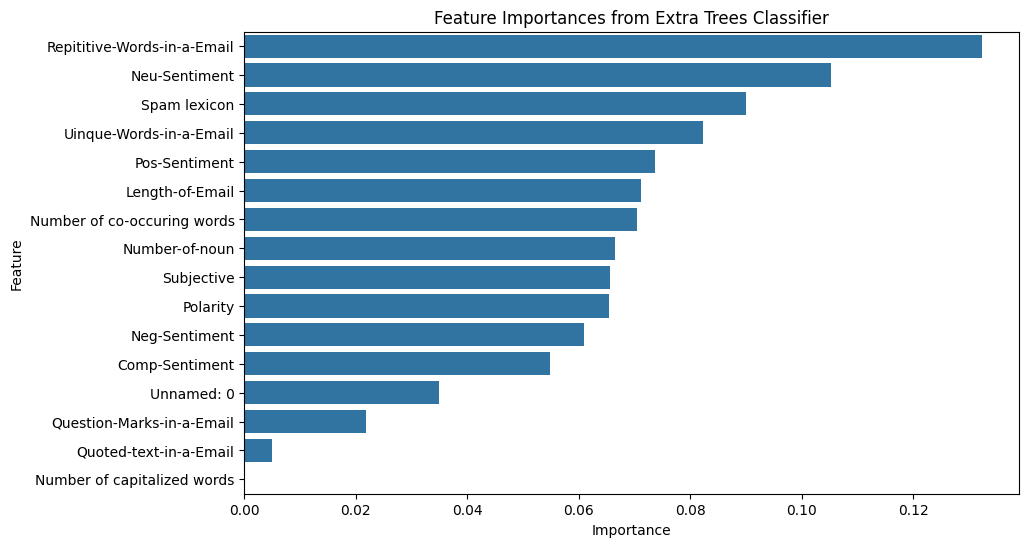

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data=df.copy()
# Drop irrelevant columns
X = data.drop(['label','Unnamed: 0'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Extra Trees Classifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Extra Trees Classifier')
plt.show()


10-Features

In [ ]:
features=feature_importances.nlargest(n=10, columns='Importance')['Feature'].to_list()
features


['Repititive-Words-in-a-Email',
 'Neu-Sentiment',
 'Spam lexicon',
 'Uinque-Words-in-a-Email',
 'Pos-Sentiment',
 'Length-of-Email',
 'Number of co-occuring words',
 'Number-of-noun',
 'Subjective',
 'Polarity']

improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7004 - loss: 0.5792 - val_accuracy: 0.7905 - val_loss: 0.4492
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7790 - loss: 0.4776 - val_accuracy: 0.7970 - val_loss: 0.4390
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7901 - loss: 0.4586 - val_accuracy: 0.8119 - val_loss: 0.4244
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7963 - loss: 0.4487 - val_accuracy: 0.8038 - val_loss: 0.4286
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8026 - loss: 0.4422 - val_accuracy: 0.8093 - val_loss: 0.4130
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8063 - loss: 0.4358 - val_accuracy: 0.8133 - val_loss: 0.4138
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8058 - loss: 0.4304 - val_accuracy: 0.8135 - val_loss: 0.4158
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8100 - loss: 0.4208 - val

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.6308 - loss: 0.6546 - val_accuracy: 0.7283 - val_loss: 0.5528
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7183 - loss: 0.5650 - val_accuracy: 0.7634 - val_loss: 0.4952
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7552 - loss: 0.5130 - val_accuracy: 0.7864 - val_loss: 0.4639
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7674 - loss: 0.4934 - val_accuracy: 0.7836 - val_loss: 0.4640
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7830 - loss: 0.4717 - val_accuracy: 0.7940 - val_loss: 0.4384
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7855 - loss: 0.4669 - val_accuracy: 0.8024 - val_loss: 0.4346
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7934 - loss: 0.4538 - val_accuracy: 0.7946 - val_loss: 0.4490
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7957 -

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.5983 - loss: 0.6980 - val_accuracy: 0.7522 - val_loss: 0.5282
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7386 - loss: 0.5376 - val_accuracy: 0.7675 - val_loss: 0.4815
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.7757 - loss: 0.4821 - val_accuracy: 0.7861 - val_loss: 0.4673
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7926 - loss: 0.4603 - val_accuracy: 0.7772 - val_loss: 0.4655
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7945 - loss: 0.4542 - val_accuracy: 0.7916 - val_loss: 0.4528
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.7930 - loss: 0.4492 - val_accuracy: 0.7516 - val_loss: 0.4905
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8016 - loss: 0.4400 - val_accuracy: 0.8072 - val_loss: 0.4258
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8010 - loss: 0.43

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6668 - loss: 0.6363 - val_accuracy: 0.7829 - val_loss: 0.4747
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7557 - loss: 0.5081 - val_accuracy: 0.7872 - val_loss: 0.4547
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7698 - loss: 0.4866 - val_accuracy: 0.7971 - val_loss: 0.4396
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7831 - loss: 0.4708 - val_accuracy: 0.7932 - val_loss: 0.4380
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7819 - loss: 0.4677 - val_accuracy: 0.7925 - val_loss: 0.4420
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7852 - loss: 0.4621 - val_accuracy: 0.7893 - val_loss: 0.4478
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7900 - loss: 0.4526 - val_accuracy: 0.8024 - val_loss: 0.4210
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7911 - loss: 0.449

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6943 - loss: 0.5768 - val_accuracy: 0.7929 - val_loss: 0.4529
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7759 - loss: 0.4820 - val_accuracy: 0.7929 - val_loss: 0.4480
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7829 - loss: 0.4673 - val_accuracy: 0.8003 - val_loss: 0.4340
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7881 - loss: 0.4610 - val_accuracy: 0.8030 - val_loss: 0.4258
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7898 - loss: 0.4556 - val_accuracy: 0.8109 - val_loss: 0.4145
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7950 - loss: 0.4464 - val_accuracy: 0.8101 - val_loss: 0.4120
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7986 - loss: 0.4446 - val_accuracy: 0.8083 - val_loss: 0.4118
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7966 - loss: 0

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6799 - loss: 0.5876 - val_accuracy: 0.7866 - val_loss: 0.4622
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7702 - loss: 0.4915 - val_accuracy: 0.7991 - val_loss: 0.4390
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7804 - loss: 0.4743 - val_accuracy: 0.8026 - val_loss: 0.4329
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7909 - loss: 0.4590 - val_accuracy: 0.8024 - val_loss: 0.4270
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7877 - loss: 0.4567 - val_accuracy: 0.8086 - val_loss: 0.4169
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7903 - loss: 0.4509 - val_accuracy: 0.8072 - val_loss: 0.4173
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7951 - loss: 0.4473 - val_accuracy: 0.8068 - val_loss: 0.4189
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7936 - loss: 0

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6905 - loss: 0.6091 - val_accuracy: 0.7924 - val_loss: 0.4430
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7837 - loss: 0.4647 - val_accuracy: 0.8055 - val_loss: 0.4287
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7917 - loss: 0.4514 - val_accuracy: 0.8094 - val_loss: 0.4200
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7968 - loss: 0.4409 - val_accuracy: 0.8184 - val_loss: 0.4080
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8033 - loss: 0.4343 - val_accuracy: 0.8191 - val_loss: 0.4064
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8091 - loss: 0.4241 - val_accuracy: 0.8308 - val_loss: 0.3926
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8089 - loss: 0.4217 - val_accuracy: 0.8290 - val_loss: 0.3894
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8135 - loss: 0.4128 - val_accurac

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.6239 - loss: 0.6589 - val_accuracy: 0.6900 - val_loss: 0.5934
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7263 - loss: 0.5589 - val_accuracy: 0.7528 - val_loss: 0.4987
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7563 - loss: 0.5204 - val_accuracy: 0.7585 - val_loss: 0.4796
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7743 - loss: 0.4927 - val_accuracy: 0.7948 - val_loss: 0.4437
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7795 - loss: 0.4811 - val_accuracy: 0.7854 - val_loss: 0.4691
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7863 - loss: 0.4686 - val_accuracy: 0.8003 - val_loss: 0.4343
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7919 - loss: 0.4637 - val_accuracy: 0.8031 - val_loss: 0.4346
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7933 - loss: 0.45

improved dnn-gru

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.5682 - loss: 0.7479 - val_accuracy: 0.6971 - val_loss: 0.5776
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6870 - loss: 0.5943 - val_accuracy: 0.7633 - val_loss: 0.4998
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.7471 - loss: 0.5228 - val_accuracy: 0.7828 - val_loss: 0.4594
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7767 - loss: 0.4829 - val_accuracy: 0.8011 - val_loss: 0.4329
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7868 - loss: 0.4663 - val_accuracy: 0.8114 - val_loss: 0.4193
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7914 - loss: 0.4528 - val_accuracy: 0.8123 - val_loss: 0.4115
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.7960 - loss: 0.4428 - val_accuracy: 0.8040 - val_loss: 0.4286
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7956 -

12-features

In [ ]:
features=feature_importances.nlargest(n=12, columns='Importance')['Feature'].to_list()
features


['Repititive-Words-in-a-Email',
 'Neu-Sentiment',
 'Spam lexicon',
 'Uinque-Words-in-a-Email',
 'Pos-Sentiment',
 'Length-of-Email',
 'Number of co-occuring words',
 'Number-of-noun',
 'Subjective',
 'Polarity',
 'Neg-Sentiment',
 'Comp-Sentiment']

improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6872 - loss: 0.5916 - val_accuracy: 0.7840 - val_loss: 0.4634
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7791 - loss: 0.4742 - val_accuracy: 0.7851 - val_loss: 0.4541
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7895 - loss: 0.4543 - val_accuracy: 0.7827 - val_loss: 0.4540
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7976 - loss: 0.4423 - val_accuracy: 0.7895 - val_loss: 0.4411
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8008 - loss: 0.4379 - val_accuracy: 0.8081 - val_loss: 0.4103
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8054 - loss: 0.4310 - val_accuracy: 0.8125 - val_loss: 0.4232
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8064 - loss: 0.4225 - val_accuracy: 0.8155 - val_loss: 0.4055
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8057 - loss: 0.4228 - val

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.6425 - loss: 0.6501 - val_accuracy: 0.6936 - val_loss: 0.5749
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.7012 - loss: 0.5775 - val_accuracy: 0.7522 - val_loss: 0.5259
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7550 - loss: 0.5109 - val_accuracy: 0.7848 - val_loss: 0.4604
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7681 - loss: 0.4934 - val_accuracy: 0.7800 - val_loss: 0.4618
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7784 - loss: 0.4746 - val_accuracy: 0.7845 - val_loss: 0.4501
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.7848 - loss: 0.4626 - val_accuracy: 0.8018 - val_loss: 0.4328
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7874 - loss: 0.4576 - val_accuracy: 0.7970 - val_loss: 0.4417
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7928 - loss: 0.44

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.6201 - loss: 0.6735 - val_accuracy: 0.6303 - val_loss: 0.6247
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.7119 - loss: 0.5680 - val_accuracy: 0.7255 - val_loss: 0.5379
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.7737 - loss: 0.4841 - val_accuracy: 0.7447 - val_loss: 0.5112
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.7863 - loss: 0.4641 - val_accuracy: 0.8050 - val_loss: 0.4248
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7935 - loss: 0.4517 - val_accuracy: 0.8053 - val_loss: 0.4241
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.7981 - loss: 0.4455 - val_accuracy: 0.7885 - val_loss: 0.4488
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7988 - loss: 0.4428 - val_accuracy: 0.8020 - val_loss: 0.4310
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.8022 - loss: 0.43

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6489 - loss: 0.6942 - val_accuracy: 0.7700 - val_loss: 0.4828
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7501 - loss: 0.5141 - val_accuracy: 0.7907 - val_loss: 0.4521
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7745 - loss: 0.4797 - val_accuracy: 0.7982 - val_loss: 0.4342
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7822 - loss: 0.4673 - val_accuracy: 0.8010 - val_loss: 0.4268
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7875 - loss: 0.4636 - val_accuracy: 0.8062 - val_loss: 0.4220
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7896 - loss: 0.4539 - val_accuracy: 0.8081 - val_loss: 0.4194
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7950 - loss: 0.4450 - val_accuracy: 0.8130 - val_loss: 0.4136
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7933 - loss: 0.4473 

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.6989 - loss: 0.5725 - val_accuracy: 0.7961 - val_loss: 0.4418
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7786 - loss: 0.4790 - val_accuracy: 0.8044 - val_loss: 0.4311
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7813 - loss: 0.4663 - val_accuracy: 0.8055 - val_loss: 0.4340
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7875 - loss: 0.4573 - val_accuracy: 0.8080 - val_loss: 0.4237
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.7898 - loss: 0.4542 - val_accuracy: 0.8101 - val_loss: 0.4203
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7980 - loss: 0.4443 - val_accuracy: 0.8065 - val_loss: 0.4267
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7977 - loss: 0.4411 - val_accuracy: 0.8126 - val_loss: 0.4132
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7975 -

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6810 - loss: 0.5871 - val_accuracy: 0.7940 - val_loss: 0.4569
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7701 - loss: 0.4892 - val_accuracy: 0.8016 - val_loss: 0.4377
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7826 - loss: 0.4698 - val_accuracy: 0.7953 - val_loss: 0.4333
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7834 - loss: 0.4666 - val_accuracy: 0.8046 - val_loss: 0.4274
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7882 - loss: 0.4563 - val_accuracy: 0.8120 - val_loss: 0.4146
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7924 - loss: 0.4548 - val_accuracy: 0.8134 - val_loss: 0.4124
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7961 - loss: 0.4429 - val_accuracy: 0.8074 - val_loss: 0.4252
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7983 -

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6671 - loss: 0.6611 - val_accuracy: 0.7883 - val_loss: 0.4542
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7699 - loss: 0.4869 - val_accuracy: 0.8033 - val_loss: 0.4303
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7886 - loss: 0.4602 - val_accuracy: 0.8125 - val_loss: 0.4164
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7967 - loss: 0.4457 - val_accuracy: 0.8160 - val_loss: 0.4147
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8021 - loss: 0.4353 - val_accuracy: 0.8235 - val_loss: 0.4042
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8068 - loss: 0.4281 - val_accuracy: 0.8088 - val_loss: 0.4147
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8109 - loss: 0.4174 - val_accuracy: 0.8236 - val_loss: 0.3931
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8141 - loss: 0.4133 - val_accura

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6250 - loss: 0.6654 - val_accuracy: 0.6934 - val_loss: 0.5885
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.6853 - loss: 0.5972 - val_accuracy: 0.7612 - val_loss: 0.5070
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7506 - loss: 0.5280 - val_accuracy: 0.7746 - val_loss: 0.4813
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7661 - loss: 0.5033 - val_accuracy: 0.7800 - val_loss: 0.4584
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7769 - loss: 0.4876 - val_accuracy: 0.7819 - val_loss: 0.4644
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7836 - loss: 0.4746 - val_accuracy: 0.8010 - val_loss: 0.4368
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7889 - loss: 0.4640 - val_accuracy: 0.8041 - val_loss: 0.4235
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7922 - loss: 0.45

improved dnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.5826 - loss: 0.7403 - val_accuracy: 0.6628 - val_loss: 0.6195
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6691 - loss: 0.6108 - val_accuracy: 0.7370 - val_loss: 0.5367
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7270 - loss: 0.5485 - val_accuracy: 0.7717 - val_loss: 0.4795
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.7623 - loss: 0.4998 - val_accuracy: 0.7857 - val_loss: 0.4571
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7752 - loss: 0.4783 - val_accuracy: 0.8033 - val_loss: 0.4295
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7867 - loss: 0.4612 - val_accuracy: 0.7991 - val_loss: 0.4413
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7902 - loss: 0.4527 - val_accuracy: 0.8132 - val_loss: 0.4185
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.7965 -

##Gradient Boosting

Feature Importances:
                        Feature  Importance
2   Repititive-Words-in-a-Email    0.328655
10                Neu-Sentiment    0.193098
8                  Spam lexicon    0.173397
3       Uinque-Words-in-a-Email    0.070117
13                     Polarity    0.051324
0               Length-of-Email    0.046473
7                Number-of-noun    0.041711
9                 Neg-Sentiment    0.033426
14                   Subjective    0.022617
12               Comp-Sentiment    0.010863
11                Pos-Sentiment    0.010829
4        Quoted-text-in-a-Email    0.006835
5     Question-Marks-in-a-Email    0.006091
6   Number of co-occuring words    0.004563
1   Number of capitalized words    0.000000


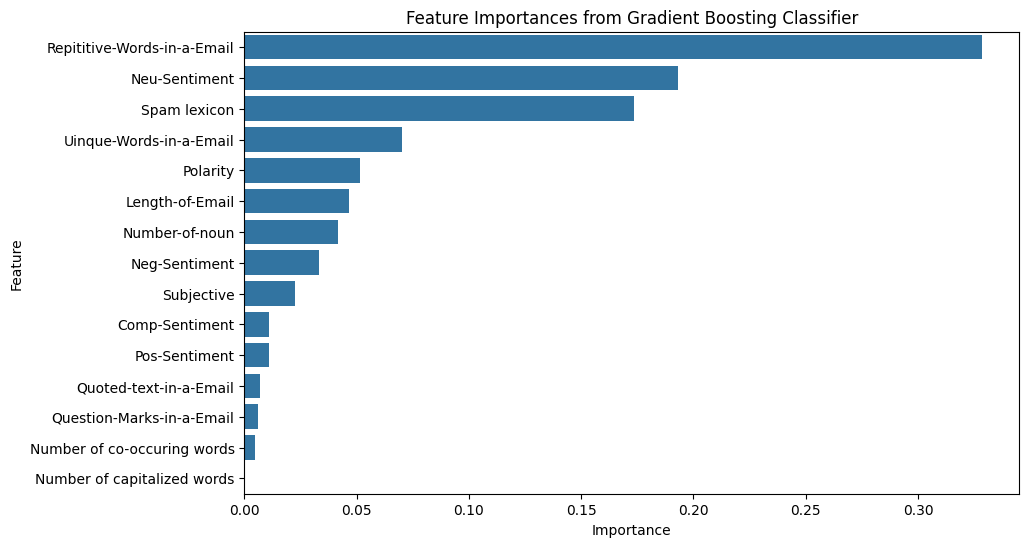

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label','Unnamed: 0'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.show()


10-Features

In [ ]:
features=feature_importances.nlargest(n=10, columns='Importance')['Feature'].to_list()
features


['Repititive-Words-in-a-Email',
 'Neu-Sentiment',
 'Spam lexicon',
 'Uinque-Words-in-a-Email',
 'Polarity',
 'Length-of-Email',
 'Number-of-noun',
 'Neg-Sentiment',
 'Subjective',
 'Comp-Sentiment']

improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7033 - loss: 0.5779 - val_accuracy: 0.7883 - val_loss: 0.4633
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7812 - loss: 0.4722 - val_accuracy: 0.7881 - val_loss: 0.4499
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7917 - loss: 0.4552 - val_accuracy: 0.8109 - val_loss: 0.4181
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7974 - loss: 0.4498 - val_accuracy: 0.8048 - val_loss: 0.4185
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7945 - loss: 0.4440 - val_accuracy: 0.7954 - val_loss: 0.4409
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7995 - loss: 0.4414 - val_accuracy: 0.8095 - val_loss: 0.4327
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8007 - loss: 0.4367 - val_accuracy: 0.8110 - val_loss: 0.4091
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8035 - loss: 0.4300 - val_acc

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6362 - loss: 0.6536 - val_accuracy: 0.7421 - val_loss: 0.5235
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7317 - loss: 0.5448 - val_accuracy: 0.7686 - val_loss: 0.4889
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7587 - loss: 0.5098 - val_accuracy: 0.7871 - val_loss: 0.4688
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7780 - loss: 0.4806 - val_accuracy: 0.7874 - val_loss: 0.4558
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7800 - loss: 0.4712 - val_accuracy: 0.8038 - val_loss: 0.4337
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7876 - loss: 0.4586 - val_accuracy: 0.7913 - val_loss: 0.4519
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7932 - loss: 0.4523 - val_accuracy: 0.8096 - val_loss: 0.4247
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7937 - loss: 0.4499 - 

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5986 - loss: 0.6859 - val_accuracy: 0.6751 - val_loss: 0.6201
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7409 - loss: 0.5364 - val_accuracy: 0.5874 - val_loss: 0.8004
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7775 - loss: 0.4795 - val_accuracy: 0.7745 - val_loss: 0.4747
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7832 - loss: 0.4689 - val_accuracy: 0.7850 - val_loss: 0.4635
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7933 - loss: 0.4551 - val_accuracy: 0.7927 - val_loss: 0.4461
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7943 - loss: 0.4478 - val_accuracy: 0.8082 - val_loss: 0.4249
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8001 - loss: 0.4431 - val_accuracy: 0.8053 - val_loss: 0.4315
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7987 - loss: 0

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6576 - loss: 0.6739 - val_accuracy: 0.7754 - val_loss: 0.4821
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7533 - loss: 0.5107 - val_accuracy: 0.7877 - val_loss: 0.4624
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7710 - loss: 0.4855 - val_accuracy: 0.7964 - val_loss: 0.4434
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7763 - loss: 0.4748 - val_accuracy: 0.7958 - val_loss: 0.4363
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7803 - loss: 0.4705 - val_accuracy: 0.8018 - val_loss: 0.4309
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7848 - loss: 0.4608 - val_accuracy: 0.8008 - val_loss: 0.4274
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7871 - loss: 0.4573 - val_accuracy: 0.8026 - val_loss: 0.4233
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7902 - loss: 0.4514 - val_accura

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6987 - loss: 0.5780 - val_accuracy: 0.7857 - val_loss: 0.4577
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7762 - loss: 0.4792 - val_accuracy: 0.7960 - val_loss: 0.4411
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7815 - loss: 0.4732 - val_accuracy: 0.7988 - val_loss: 0.4376
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7857 - loss: 0.4610 - val_accuracy: 0.8023 - val_loss: 0.4266
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7915 - loss: 0.4559 - val_accuracy: 0.8097 - val_loss: 0.4225
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7928 - loss: 0.4522 - val_accuracy: 0.8084 - val_loss: 0.4183
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7930 - loss: 0.4484 - val_accuracy: 0.8098 - val_loss: 0.4179
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7918 - loss: 0.44

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6868 - loss: 0.5820 - val_accuracy: 0.7869 - val_loss: 0.4555
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7692 - loss: 0.4852 - val_accuracy: 0.7941 - val_loss: 0.4463
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7806 - loss: 0.4719 - val_accuracy: 0.8034 - val_loss: 0.4343
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7828 - loss: 0.4684 - val_accuracy: 0.8003 - val_loss: 0.4357
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7847 - loss: 0.4628 - val_accuracy: 0.7978 - val_loss: 0.4399
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7905 - loss: 0.4563 - val_accuracy: 0.8095 - val_loss: 0.4195
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7944 - loss: 0.4476 - val_accuracy: 0.8100 - val_loss: 0.4173
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7913 - loss: 0.44

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6807 - loss: 0.6250 - val_accuracy: 0.7881 - val_loss: 0.4472
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7760 - loss: 0.4770 - val_accuracy: 0.8070 - val_loss: 0.4199
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7914 - loss: 0.4513 - val_accuracy: 0.8161 - val_loss: 0.4112
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7977 - loss: 0.4409 - val_accuracy: 0.8213 - val_loss: 0.4070
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8036 - loss: 0.4314 - val_accuracy: 0.8205 - val_loss: 0.4012
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8056 - loss: 0.4272 - val_accuracy: 0.8229 - val_loss: 0.3979
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8106 - loss: 0.4198 - val_accuracy: 0.8250 - val_loss: 0.3926
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8131 - loss: 0.4134 - val_accura

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.6049 - loss: 0.6853 - val_accuracy: 0.7386 - val_loss: 0.5327
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7265 - loss: 0.5598 - val_accuracy: 0.6956 - val_loss: 0.5498
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7527 - loss: 0.5235 - val_accuracy: 0.7800 - val_loss: 0.4679
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7689 - loss: 0.5001 - val_accuracy: 0.7854 - val_loss: 0.4560
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7784 - loss: 0.4816 - val_accuracy: 0.7594 - val_loss: 0.4890
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7831 - loss: 0.4693 - val_accuracy: 0.7985 - val_loss: 0.4357
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7873 - loss: 0.4657 - val_accuracy: 0.8001 - val_loss: 0.4423
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7892 -

improved dnn-gru

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 51s 25ms/step - accuracy: 0.5482 - loss: 0.7828 - val_accuracy: 0.7184 - val_loss: 0.5487
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.7100 - loss: 0.5684 - val_accuracy: 0.7758 - val_loss: 0.4755
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7567 - loss: 0.5100 - val_accuracy: 0.7879 - val_loss: 0.4577
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.7735 - loss: 0.4847 - val_accuracy: 0.7974 - val_loss: 0.4404
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.7798 - loss: 0.4718 - val_accuracy: 0.8024 - val_loss: 0.4304
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.7819 - loss: 0.4639 - val_accuracy: 0.8044 - val_loss: 0.4230
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.7919 - loss: 0.4514 - val_accuracy: 0.8117 - val_loss: 0.4131
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.7930 -

12-features

In [ ]:
features=feature_importances.nlargest(n=12, columns='Importance')['Feature'].to_list()
features


['Repititive-Words-in-a-Email',
 'Neu-Sentiment',
 'Spam lexicon',
 'Uinque-Words-in-a-Email',
 'Polarity',
 'Length-of-Email',
 'Number-of-noun',
 'Neg-Sentiment',
 'Subjective',
 'Comp-Sentiment',
 'Pos-Sentiment',
 'Quoted-text-in-a-Email']

improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.6939 - loss: 0.5916 - val_accuracy: 0.7908 - val_loss: 0.4469
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7830 - loss: 0.4720 - val_accuracy: 0.7931 - val_loss: 0.4380
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7919 - loss: 0.4605 - val_accuracy: 0.7976 - val_loss: 0.4467
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8003 - loss: 0.4470 - val_accuracy: 0.8120 - val_loss: 0.4158
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8041 - loss: 0.4366 - val_accuracy: 0.7976 - val_loss: 0.4230
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8037 - loss: 0.4361 - val_accuracy: 0.8134 - val_loss: 0.4043
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8099 - loss: 0.4244 - val_accuracy: 0.8077 - val_loss: 0.4269
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8108 -

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.6244 - loss: 0.6696 - val_accuracy: 0.5646 - val_loss: 0.7045
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 77s 22ms/step - accuracy: 0.7267 - loss: 0.5513 - val_accuracy: 0.7646 - val_loss: 0.4974
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.7531 - loss: 0.5143 - val_accuracy: 0.7176 - val_loss: 0.5472
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7712 - loss: 0.4841 - val_accuracy: 0.7951 - val_loss: 0.4486
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7794 - loss: 0.4749 - val_accuracy: 0.6849 - val_loss: 0.6030
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7836 - loss: 0.4661 - val_accuracy: 0.7997 - val_loss: 0.4333
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7889 - loss: 0.4587 - val_accuracy: 0.7728 - val_loss: 0.4846
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7960 -

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.5871 - loss: 0.6952 - val_accuracy: 0.7003 - val_loss: 0.5682
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.7339 - loss: 0.5458 - val_accuracy: 0.7161 - val_loss: 0.5473
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.7712 - loss: 0.4899 - val_accuracy: 0.7951 - val_loss: 0.4472
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.7843 - loss: 0.4678 - val_accuracy: 0.7315 - val_loss: 0.5449
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.7846 - loss: 0.4630 - val_accuracy: 0.7816 - val_loss: 0.4701
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.7905 - loss: 0.4540 - val_accuracy: 0.7959 - val_loss: 0.4409
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7938 - loss: 0.4529 - val_accuracy: 0.7737 - val_loss: 0.4753
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7965 - loss: 0.44

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6538 - loss: 0.6762 - val_accuracy: 0.7737 - val_loss: 0.4878
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7467 - loss: 0.5188 - val_accuracy: 0.7880 - val_loss: 0.4658
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7720 - loss: 0.4862 - val_accuracy: 0.7913 - val_loss: 0.4497
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7738 - loss: 0.4781 - val_accuracy: 0.8028 - val_loss: 0.4376
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7830 - loss: 0.4662 - val_accuracy: 0.8033 - val_loss: 0.4284
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7859 - loss: 0.4593 - val_accuracy: 0.8077 - val_loss: 0.4250
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7877 - loss: 0.4545 - val_accuracy: 0.8074 - val_loss: 0.4180
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7933 - loss: 0.452

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.6877 - loss: 0.5818 - val_accuracy: 0.7880 - val_loss: 0.4565
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7732 - loss: 0.4859 - val_accuracy: 0.7958 - val_loss: 0.4447
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7838 - loss: 0.4656 - val_accuracy: 0.8003 - val_loss: 0.4310
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7857 - loss: 0.4630 - val_accuracy: 0.8027 - val_loss: 0.4290
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7880 - loss: 0.4557 - val_accuracy: 0.8000 - val_loss: 0.4298
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7956 - loss: 0.4463 - val_accuracy: 0.8062 - val_loss: 0.4239
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7959 - loss: 0.4449 - val_accuracy: 0.8126 - val_loss: 0.4123
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8007 -

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.6576 - loss: 0.6086 - val_accuracy: 0.7875 - val_loss: 0.4622
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7664 - loss: 0.4967 - val_accuracy: 0.7907 - val_loss: 0.4499
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7796 - loss: 0.4745 - val_accuracy: 0.8012 - val_loss: 0.4398
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7807 - loss: 0.4712 - val_accuracy: 0.7975 - val_loss: 0.4399
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7889 - loss: 0.4577 - val_accuracy: 0.8047 - val_loss: 0.4273
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7903 - loss: 0.4556 - val_accuracy: 0.8056 - val_loss: 0.4220
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7960 - loss: 0.4447 - val_accuracy: 0.8092 - val_loss: 0.4220
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8013 -

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6771 - loss: 0.6270 - val_accuracy: 0.7943 - val_loss: 0.4460
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7741 - loss: 0.4782 - val_accuracy: 0.7997 - val_loss: 0.4416
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7954 - loss: 0.4497 - val_accuracy: 0.8137 - val_loss: 0.4223
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7982 - loss: 0.4408 - val_accuracy: 0.8180 - val_loss: 0.4160
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8040 - loss: 0.4312 - val_accuracy: 0.7998 - val_loss: 0.4270
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8037 - loss: 0.4246 - val_accuracy: 0.8248 - val_loss: 0.3988
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8096 - loss: 0.4221 - val_accuracy: 0.8085 - val_loss: 0.4162
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8103 - loss: 0.4206 - val_acc

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.6104 - loss: 0.6683 - val_accuracy: 0.7084 - val_loss: 0.5664
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7291 - loss: 0.5617 - val_accuracy: 0.7546 - val_loss: 0.5139
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7507 - loss: 0.5291 - val_accuracy: 0.7648 - val_loss: 0.4920
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7704 - loss: 0.4981 - val_accuracy: 0.7750 - val_loss: 0.4748
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7740 - loss: 0.4884 - val_accuracy: 0.7749 - val_loss: 0.4881
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7830 - loss: 0.4765 - val_accuracy: 0.7988 - val_loss: 0.4455
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7903 - loss: 0.4643 - val_accuracy: 0.7742 - val_loss: 0.4887
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7908 -

improved dnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.5651 - loss: 0.7594 - val_accuracy: 0.6381 - val_loss: 0.6342
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.6656 - loss: 0.6137 - val_accuracy: 0.7766 - val_loss: 0.4827
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.7519 - loss: 0.5123 - val_accuracy: 0.7774 - val_loss: 0.4660
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.7687 - loss: 0.4877 - val_accuracy: 0.8020 - val_loss: 0.4357
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7810 - loss: 0.4686 - val_accuracy: 0.8060 - val_loss: 0.4243
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.7893 - loss: 0.4552 - val_accuracy: 0.8107 - val_loss: 0.4195
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.7910 - loss: 0.4545 - val_accuracy: 0.8100 - val_loss: 0.4159
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7897 -

In [ ]:
import pandas as pd
df= pd.read_csv('/content/finalFeatures.csv')
df.head(1)

,Unnamed: 0,Length-of-Email,Number of capitalized words,Repititive-Words-in-a-Email,Uinque-Words-in-a-Email,Quoted-text-in-a-Email,Question-Marks-in-a-Email,Number of co-occuring words,Number-of-noun,Spam lexicon,label,Neg-Sentiment,Neu-Sentiment,Pos-Sentiment,Comp-Sentiment,Polarity,Subjective
0,0,0.000246,0.0,0.0,0.003667,0.0,0.0,0.000186,0.000234,0.0,1,0.108,0.892,0.0,-0.3182,-0.6,1.0


##Prinicpal Component Analysis

Feature Importances based on PCA:
                        Feature  Importance (PC1)  Importance (PC2)  \
0               Length-of-Email          0.143662         -0.003176   
6   Number of co-occuring words          0.145311         -0.000927   
2   Repititive-Words-in-a-Email          0.137547          0.001102   
8                  Spam lexicon          0.126001          0.010724   
3       Uinque-Words-in-a-Email          0.128352          0.004645   
7                Number-of-noun          0.127575         -0.005017   
11                Pos-Sentiment         -0.009527          0.099317   
10                Neu-Sentiment          0.007039         -0.086974   
12               Comp-Sentiment          0.015953          0.069741   
13                     Polarity         -0.007686          0.069581   
14                   Subjective          0.002174          0.048485   
4        Quoted-text-in-a-Email          0.008410          0.002480   
5     Question-Marks-in-a-Email          0.

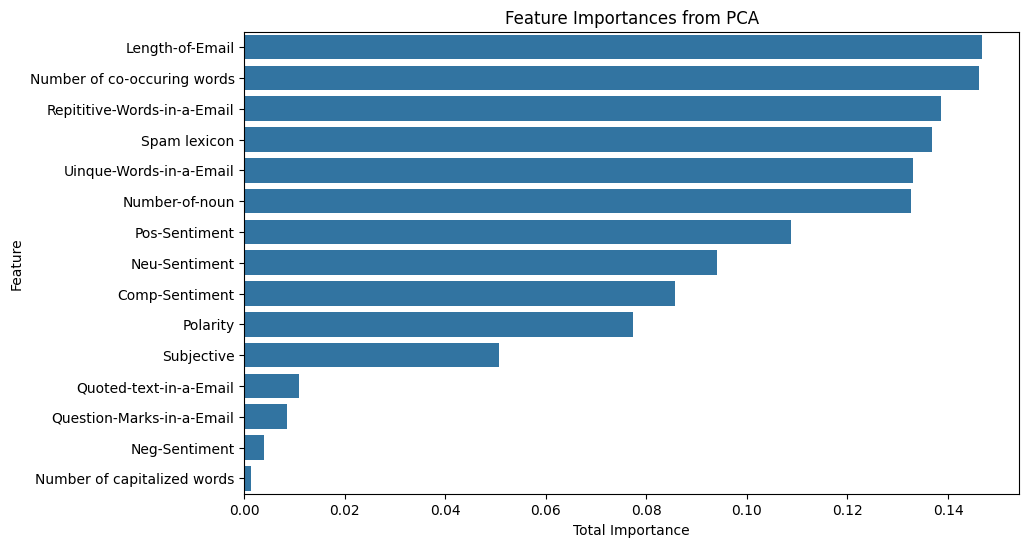

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data.drop(['label','Unnamed: 0'], axis=1)  # Assuming 'label' is the target variable
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=None)  # Retain all components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the loadings (contributions of each original feature to the principal components)
loadings = pca.components_.T

# Create a DataFrame to display feature contributions to the principal components
pca_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance (PC1)': loadings[:, 0] * explained_variance_ratio[0],
    'Importance (PC2)': loadings[:, 1] * explained_variance_ratio[1],
    # Add more columns for additional principal components if needed
})

# Summarize importance by taking the absolute value of the loadings weighted by the explained variance
pca_importances['Total Importance'] = pca_importances.iloc[:, 1:].abs().sum(axis=1)

# Sort by total importance
pca_importances = pca_importances.sort_values(by='Total Importance', ascending=False)

# Display the feature importances
print("Feature Importances based on PCA:")
print(pca_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Importance', y='Feature', data=pca_importances)
plt.title('Feature Importances from PCA')
plt.show()


In [ ]:
pca_importances

,Feature,Importance (PC1),Importance (PC2),Total Importance
0,Length-of-Email,0.143662,-0.003176,0.146837
6,Number of co-occuring words,0.145311,-0.000927,0.146238
2,Repititive-Words-in-a-Email,0.137547,0.001102,0.138650
8,Spam lexicon,0.126001,0.010724,0.136725
3,Uinque-Words-in-a-Email,0.128352,0.004645,0.132997
7,Number-of-noun,0.127575,-0.005017,0.132591
11,Pos-Sentiment,-0.009527,0.099317,0.108844
10,Neu-Sentiment,0.007039,-0.086974,0.094013
12,Comp-Sentiment,0.015953,0.069741,0.085694
13,Polarity,-0.007686,0.069581,0.077267


10-features

In [ ]:
features=pca_importances.nlargest(n=10, columns='Total Importance')['Feature'].to_list()
features


['Length-of-Email',
 'Number of co-occuring words',
 'Repititive-Words-in-a-Email',
 'Spam lexicon',
 'Uinque-Words-in-a-Email',
 'Number-of-noun',
 'Pos-Sentiment',
 'Neu-Sentiment',
 'Comp-Sentiment',
 'Polarity']

improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7067 - loss: 0.5811 - val_accuracy: 0.8028 - val_loss: 0.4320
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.7934 - loss: 0.4593 - val_accuracy: 0.8086 - val_loss: 0.4206
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8028 - loss: 0.4378 - val_accuracy: 0.8161 - val_loss: 0.4068
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8084 - loss: 0.4293 - val_accuracy: 0.8014 - val_loss: 0.4245
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8118 - loss: 0.4206 - val_accuracy: 0.8175 - val_loss: 0.3996
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8130 - loss: 0.4178 - val_accuracy: 0.8230 - val_loss: 0.3976
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8178 - loss: 0.4085 - val_accuracy: 0.8161 - val_loss: 0.4082
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8242 -

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.5727 - loss: 0.7063 - val_accuracy: 0.6690 - val_loss: 0.6122
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.6675 - loss: 0.6095 - val_accuracy: 0.7469 - val_loss: 0.5097
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7495 - loss: 0.5132 - val_accuracy: 0.7577 - val_loss: 0.4815
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7815 - loss: 0.4703 - val_accuracy: 0.7973 - val_loss: 0.4357
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7940 - loss: 0.4525 - val_accuracy: 0.7746 - val_loss: 0.4506
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.7977 - loss: 0.4469 - val_accuracy: 0.8011 - val_loss: 0.4297
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.8032 - loss: 0.4346 - val_accuracy: 0.8107 - val_loss: 0.4119
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8022 - loss: 0.43

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5961 - loss: 0.6893 - val_accuracy: 0.6635 - val_loss: 0.6068
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.6626 - loss: 0.6138 - val_accuracy: 0.7733 - val_loss: 0.4716
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7695 - loss: 0.4915 - val_accuracy: 0.7602 - val_loss: 0.4932
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7832 - loss: 0.4630 - val_accuracy: 0.7837 - val_loss: 0.4566
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7929 - loss: 0.4485 - val_accuracy: 0.8050 - val_loss: 0.4216
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.7968 - loss: 0.4422 - val_accuracy: 0.8077 - val_loss: 0.4187
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.8039 - loss: 0.4322 - val_accuracy: 0.7974 - val_loss: 0.4374
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.8090 - loss: 0.42

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6679 - loss: 0.6470 - val_accuracy: 0.7916 - val_loss: 0.4522
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7696 - loss: 0.4884 - val_accuracy: 0.7971 - val_loss: 0.4358
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7843 - loss: 0.4621 - val_accuracy: 0.8037 - val_loss: 0.4236
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7934 - loss: 0.4502 - val_accuracy: 0.8051 - val_loss: 0.4173
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7959 - loss: 0.4472 - val_accuracy: 0.8164 - val_loss: 0.4116
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8024 - loss: 0.4337 - val_accuracy: 0.8133 - val_loss: 0.4135
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7985 - loss: 0.4364 - val_accuracy: 0.8169 - val_loss: 0.4048
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8045 - loss: 0.4313 - val_acc

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6983 - loss: 0.5708 - val_accuracy: 0.7930 - val_loss: 0.4531
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7846 - loss: 0.4657 - val_accuracy: 0.7995 - val_loss: 0.4283
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7984 - loss: 0.4465 - val_accuracy: 0.8065 - val_loss: 0.4187
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7971 - loss: 0.4402 - val_accuracy: 0.8104 - val_loss: 0.4103
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8023 - loss: 0.4334 - val_accuracy: 0.8092 - val_loss: 0.4107
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8008 - loss: 0.4351 - val_accuracy: 0.8143 - val_loss: 0.4066
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8081 - loss: 0.4262 - val_accuracy: 0.8101 - val_loss: 0.4161
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8083 - loss: 

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.6767 - loss: 0.5894 - val_accuracy: 0.7925 - val_loss: 0.4497
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7819 - loss: 0.4713 - val_accuracy: 0.7997 - val_loss: 0.4262
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7899 - loss: 0.4548 - val_accuracy: 0.8062 - val_loss: 0.4268
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7946 - loss: 0.4457 - val_accuracy: 0.8135 - val_loss: 0.4113
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8007 - loss: 0.4401 - val_accuracy: 0.8117 - val_loss: 0.4084
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8011 - loss: 0.4323 - val_accuracy: 0.8136 - val_loss: 0.4126
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8011 - loss: 0.4324 - val_accuracy: 0.8152 - val_loss: 0.4049
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8056 - loss:

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6808 - loss: 0.6296 - val_accuracy: 0.7895 - val_loss: 0.4531
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7779 - loss: 0.4741 - val_accuracy: 0.8037 - val_loss: 0.4289
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7918 - loss: 0.4546 - val_accuracy: 0.8155 - val_loss: 0.4180
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7994 - loss: 0.4390 - val_accuracy: 0.8128 - val_loss: 0.4166
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8026 - loss: 0.4340 - val_accuracy: 0.8118 - val_loss: 0.4142
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8040 - loss: 0.4272 - val_accuracy: 0.8208 - val_loss: 0.4036
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8102 - loss: 0.4189 - val_accuracy: 0.8231 - val_loss: 0.3981
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8105 - loss: 0.420

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.5532 - loss: 0.7020 - val_accuracy: 0.6422 - val_loss: 0.6396
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.6394 - loss: 0.6409 - val_accuracy: 0.7321 - val_loss: 0.5392
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7376 - loss: 0.5361 - val_accuracy: 0.7851 - val_loss: 0.4545
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.7805 - loss: 0.4800 - val_accuracy: 0.7937 - val_loss: 0.4364
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7916 - loss: 0.4623 - val_accuracy: 0.7991 - val_loss: 0.4297
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7985 - loss: 0.4494 - val_accuracy: 0.8077 - val_loss: 0.4179
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7968 - loss: 0.4437 - val_accuracy: 0.8076 - val_loss: 0.4173
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8057 -

improved dnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.5686 - loss: 0.7584 - val_accuracy: 0.6624 - val_loss: 0.6121
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6543 - loss: 0.6238 - val_accuracy: 0.7200 - val_loss: 0.5466
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7276 - loss: 0.5427 - val_accuracy: 0.7850 - val_loss: 0.4606
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.7666 - loss: 0.4902 - val_accuracy: 0.7785 - val_loss: 0.4755
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.7806 - loss: 0.4715 - val_accuracy: 0.8000 - val_loss: 0.4304
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.7860 - loss: 0.4619 - val_accuracy: 0.8038 - val_loss: 0.4266
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.7937 - loss: 0.4472 - val_accuracy: 0.8107 - val_loss: 0.4139
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.7944 -

12-features

In [ ]:
features=pca_importances.nlargest(n=12, columns='Total Importance')['Feature'].to_list()
features


['Length-of-Email',
 'Number of co-occuring words',
 'Repititive-Words-in-a-Email',
 'Spam lexicon',
 'Uinque-Words-in-a-Email',
 'Number-of-noun',
 'Pos-Sentiment',
 'Neu-Sentiment',
 'Comp-Sentiment',
 'Polarity',
 'Subjective',
 'Quoted-text-in-a-Email']

improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7032 - loss: 0.5842 - val_accuracy: 0.8053 - val_loss: 0.4314
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8019 - loss: 0.4504 - val_accuracy: 0.8143 - val_loss: 0.4111
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8089 - loss: 0.4312 - val_accuracy: 0.8214 - val_loss: 0.3995
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8142 - loss: 0.4198 - val_accuracy: 0.8271 - val_loss: 0.3869
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8204 - loss: 0.4065 - val_accuracy: 0.8295 - val_loss: 0.3903
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8208 - loss: 0.4021 - val_accuracy: 0.8253 - val_loss: 0.3988
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8271 - loss: 0.3981 - val_accuracy: 0.8342 - val_loss: 0.3807
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8283 -

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.5753 - loss: 0.7069 - val_accuracy: 0.6396 - val_loss: 0.6274
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.6320 - loss: 0.6421 - val_accuracy: 0.6749 - val_loss: 0.6021
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.6781 - loss: 0.6013 - val_accuracy: 0.6997 - val_loss: 0.5617
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 70s 19ms/step - accuracy: 0.7318 - loss: 0.5357 - val_accuracy: 0.7528 - val_loss: 0.4956
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.7606 - loss: 0.4965 - val_accuracy: 0.7812 - val_loss: 0.4536
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.7787 - loss: 0.4686 - val_accuracy: 0.7892 - val_loss: 0.4386
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.7909 - loss: 0.4563 - val_accuracy: 0.8085 - val_loss: 0.4152
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8003 -

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.5604 - loss: 0.7270 - val_accuracy: 0.6472 - val_loss: 0.6289
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.6371 - loss: 0.6391 - val_accuracy: 0.6743 - val_loss: 0.6055
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7634 - loss: 0.5014 - val_accuracy: 0.7763 - val_loss: 0.4846
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7841 - loss: 0.4690 - val_accuracy: 0.8032 - val_loss: 0.4243
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7960 - loss: 0.4503 - val_accuracy: 0.7900 - val_loss: 0.4423
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7983 - loss: 0.4440 - val_accuracy: 0.8099 - val_loss: 0.4155
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.8021 - loss: 0.4361 - val_accuracy: 0.8113 - val_loss: 0.4114
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8058 - loss: 0.43

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6538 - loss: 0.6662 - val_accuracy: 0.7922 - val_loss: 0.4531
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7671 - loss: 0.4878 - val_accuracy: 0.8048 - val_loss: 0.4270
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7854 - loss: 0.4629 - val_accuracy: 0.8060 - val_loss: 0.4233
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7916 - loss: 0.4533 - val_accuracy: 0.8096 - val_loss: 0.4125
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7983 - loss: 0.4427 - val_accuracy: 0.8170 - val_loss: 0.4060
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7998 - loss: 0.4381 - val_accuracy: 0.8150 - val_loss: 0.4032
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7999 - loss: 0.4339 - val_accuracy: 0.8147 - val_loss: 0.4014
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8042 - loss: 0.4292

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6763 - loss: 0.5865 - val_accuracy: 0.7945 - val_loss: 0.4433
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7847 - loss: 0.4669 - val_accuracy: 0.8053 - val_loss: 0.4209
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7928 - loss: 0.4507 - val_accuracy: 0.8093 - val_loss: 0.4154
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8016 - loss: 0.4352 - val_accuracy: 0.8072 - val_loss: 0.4213
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8033 - loss: 0.4298 - val_accuracy: 0.8146 - val_loss: 0.4019
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8018 - loss: 0.4298 - val_accuracy: 0.8210 - val_loss: 0.3972
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8104 - loss: 0.4179 - val_accuracy: 0.8212 - val_loss: 0.3975
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8084 - loss: 0.4191 - val

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6761 - loss: 0.5948 - val_accuracy: 0.7959 - val_loss: 0.4465
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7816 - loss: 0.4716 - val_accuracy: 0.8027 - val_loss: 0.4242
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7939 - loss: 0.4502 - val_accuracy: 0.8052 - val_loss: 0.4234
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8002 - loss: 0.4419 - val_accuracy: 0.8104 - val_loss: 0.4152
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8038 - loss: 0.4338 - val_accuracy: 0.8148 - val_loss: 0.4043
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8062 - loss: 0.4252 - val_accuracy: 0.8162 - val_loss: 0.4075
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8075 - loss: 0.4271 - val_accuracy: 0.8231 - val_loss: 0.3941
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8099 - loss: 

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6719 - loss: 0.6508 - val_accuracy: 0.7957 - val_loss: 0.4461
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7752 - loss: 0.4742 - val_accuracy: 0.8031 - val_loss: 0.4350
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7900 - loss: 0.4531 - val_accuracy: 0.8124 - val_loss: 0.4178
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7971 - loss: 0.4434 - val_accuracy: 0.8035 - val_loss: 0.4255
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8022 - loss: 0.4331 - val_accuracy: 0.8207 - val_loss: 0.4005
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8094 - loss: 0.4199 - val_accuracy: 0.8228 - val_loss: 0.4030
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8099 - loss: 0.4171 - val_accuracy: 0.8268 - val_loss: 0.3916
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8137 - loss: 0.4149 - val_accura

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.5647 - loss: 0.6967 - val_accuracy: 0.5885 - val_loss: 0.6691
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.6189 - loss: 0.6539 - val_accuracy: 0.5988 - val_loss: 0.6703
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.6570 - loss: 0.6218 - val_accuracy: 0.7281 - val_loss: 0.5380
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7277 - loss: 0.5480 - val_accuracy: 0.7681 - val_loss: 0.4745
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7580 - loss: 0.5065 - val_accuracy: 0.7773 - val_loss: 0.4722
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7777 - loss: 0.4806 - val_accuracy: 0.7984 - val_loss: 0.4270
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.7869 - loss: 0.4635 - val_accuracy: 0.8076 - val_loss: 0.4202
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.7945 - loss: 0.45

improved dnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.5492 - loss: 0.7621 - val_accuracy: 0.6366 - val_loss: 0.6349
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.6269 - loss: 0.6470 - val_accuracy: 0.7000 - val_loss: 0.5777
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.7044 - loss: 0.5719 - val_accuracy: 0.7757 - val_loss: 0.4762
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.7655 - loss: 0.4952 - val_accuracy: 0.8038 - val_loss: 0.4289
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7841 - loss: 0.4699 - val_accuracy: 0.8010 - val_loss: 0.4312
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7894 - loss: 0.4620 - val_accuracy: 0.8028 - val_loss: 0.4309
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7954 - loss: 0.4486 - val_accuracy: 0.8146 - val_loss: 0.4046
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7936 -

Random 10-features

In [ ]:
features=['Length-of-Email','Number of co-occuring words',
 'Repititive-Words-in-a-Email',
                  'Spam lexicon',
       'Uinque-Words-in-a-Email','Subjective',
        'Quoted-text-in-a-Email',
     'Question-Marks-in-a-Email',
                 'Neg-Sentiment',
   'Number of capitalized words' ]
features


['Length-of-Email',
 'Number of co-occuring words',
 'Repititive-Words-in-a-Email',
 'Spam lexicon',
 'Uinque-Words-in-a-Email',
 'Subjective',
 'Quoted-text-in-a-Email',
 'Question-Marks-in-a-Email',
 'Neg-Sentiment',
 'Number of capitalized words']

improved rnn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()

# RNN layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SimpleRNN(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7015 - loss: 0.5948 - val_accuracy: 0.7867 - val_loss: 0.4622
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7744 - loss: 0.4900 - val_accuracy: 0.7944 - val_loss: 0.4513
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7844 - loss: 0.4721 - val_accuracy: 0.7943 - val_loss: 0.4351
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7949 - loss: 0.4525 - val_accuracy: 0.8011 - val_loss: 0.4341
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8038 - loss: 0.4447 - val_accuracy: 0.8023 - val_loss: 0.4192
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8037 - loss: 0.4418 - val_accuracy: 0.8140 - val_loss: 0.4078
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8054 - loss: 0.4370 - val_accuracy: 0.8124 - val_loss: 0.4086
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8094 - loss: 0.4297 - val

improved rnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.5921 - loss: 0.6871 - val_accuracy: 0.6497 - val_loss: 0.6257
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.6433 - loss: 0.6316 - val_accuracy: 0.6809 - val_loss: 0.5922
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6770 - loss: 0.5994 - val_accuracy: 0.7389 - val_loss: 0.5225
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7508 - loss: 0.5096 - val_accuracy: 0.7585 - val_loss: 0.4822
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7799 - loss: 0.4810 - val_accuracy: 0.7988 - val_loss: 0.4403
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7870 - loss: 0.4665 - val_accuracy: 0.8046 - val_loss: 0.4346
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7930 - loss: 0.4580 - val_accuracy: 0.8049 - val_loss: 0.4315
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7959 - loss: 0.45

improved rnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN-GRU model
model = Sequential()

# GRU layers
model.add(GRU(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.5824 - loss: 0.6988 - val_accuracy: 0.6197 - val_loss: 0.6370
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.6933 - loss: 0.5841 - val_accuracy: 0.7678 - val_loss: 0.4812
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.7726 - loss: 0.4926 - val_accuracy: 0.7836 - val_loss: 0.4682
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.7835 - loss: 0.4780 - val_accuracy: 0.7984 - val_loss: 0.4456
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7907 - loss: 0.4633 - val_accuracy: 0.7983 - val_loss: 0.4410
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.7892 - loss: 0.4627 - val_accuracy: 0.8009 - val_loss: 0.4330
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.7964 - loss: 0.4542 - val_accuracy: 0.7943 - val_loss: 0.4398
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7965 - loss: 0.45

improved cnn


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the optimized CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6418 - loss: 0.6797 - val_accuracy: 0.7829 - val_loss: 0.4799
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7623 - loss: 0.5031 - val_accuracy: 0.7895 - val_loss: 0.4568
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7769 - loss: 0.4813 - val_accuracy: 0.7974 - val_loss: 0.4525
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7824 - loss: 0.4727 - val_accuracy: 0.7955 - val_loss: 0.4441
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7865 - loss: 0.4669 - val_accuracy: 0.7982 - val_loss: 0.4397
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7898 - loss: 0.4629 - val_accuracy: 0.7994 - val_loss: 0.4375
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7955 - loss: 0.4565 - val_accuracy: 0.7970 - val_loss: 0.4456
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7944 - loss: 0.4523 - val_acc

improved cnn-lstm


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-LSTM model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6932 - loss: 0.5788 - val_accuracy: 0.7907 - val_loss: 0.4644
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7780 - loss: 0.4808 - val_accuracy: 0.7931 - val_loss: 0.4521
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7826 - loss: 0.4703 - val_accuracy: 0.8000 - val_loss: 0.4415
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7864 - loss: 0.4691 - val_accuracy: 0.7989 - val_loss: 0.4423
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7908 - loss: 0.4605 - val_accuracy: 0.7972 - val_loss: 0.4454
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7928 - loss: 0.4528 - val_accuracy: 0.8023 - val_loss: 0.4269
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7926 - loss: 0.4512 - val_accuracy: 0.8031 - val_loss: 0.4256
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7974 - loss: 

improved cnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN-GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the CNN-GRU model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(25))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.6728 - loss: 0.5983 - val_accuracy: 0.7794 - val_loss: 0.4753
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7754 - loss: 0.4896 - val_accuracy: 0.7924 - val_loss: 0.4479
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7818 - loss: 0.4743 - val_accuracy: 0.7934 - val_loss: 0.4465
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7908 - loss: 0.4609 - val_accuracy: 0.7979 - val_loss: 0.4485
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7856 - loss: 0.4669 - val_accuracy: 0.8036 - val_loss: 0.4380
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7910 - loss: 0.4589 - val_accuracy: 0.7979 - val_loss: 0.4271
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7898 - loss: 0.4585 - val_accuracy: 0.8013 - val_loss: 0.4280
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7899 - loss

improved DNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = Sequential()

# Input and hidden layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6882 - loss: 0.6353 - val_accuracy: 0.7816 - val_loss: 0.4713
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7658 - loss: 0.4948 - val_accuracy: 0.7905 - val_loss: 0.4600
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7794 - loss: 0.4738 - val_accuracy: 0.8010 - val_loss: 0.4442
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7884 - loss: 0.4616 - val_accuracy: 0.8031 - val_loss: 0.4341
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7888 - loss: 0.4559 - val_accuracy: 0.7997 - val_loss: 0.4332
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7890 - loss: 0.4563 - val_accuracy: 0.8078 - val_loss: 0.4240
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7963 - loss: 0.4510 - val_accuracy: 0.8052 - val_loss: 0.4227
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7984 - loss: 0.4424 - val_accurac

improved dnn-lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1669/1669 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.5829 - loss: 0.6978 - val_accuracy: 0.6536 - val_loss: 0.6222
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.6431 - loss: 0.6354 - val_accuracy: 0.6556 - val_loss: 0.6170
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6776 - loss: 0.5993 - val_accuracy: 0.7680 - val_loss: 0.5001
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.7525 - loss: 0.5192 - val_accuracy: 0.7871 - val_loss: 0.4607
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.7763 - loss: 0.4882 - val_accuracy: 0.7899 - val_loss: 0.4524
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7866 - loss: 0.4744 - val_accuracy: 0.7903 - val_loss: 0.4440
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.7914 - loss: 0.4708 - val_accuracy: 0.8003 - val_loss: 0.4351
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7931 - loss: 0.46

improved dnn-gru

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf  # Import TensorFlow

# Load your data
data = df.copy()

# Drop irrelevant columns
X = data[features]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the DNN-GRU model
model = Sequential()

# Dense layers
model.add(Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Reshape output from Dense layers to be suitable for GRU layers
model.add(tf.keras.layers.Reshape((X_train_reshaped.shape[1], 32)))

# GRU layers
model.add(GRU(64, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(GRU(32, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                    ])

# Evaluate the model
y_pred_probs = model.predict(X_test_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can also extract individual metrics if needed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 49s 24ms/step - accuracy: 0.5422 - loss: 0.7733 - val_accuracy: 0.6281 - val_loss: 0.6287
Epoch 2/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.6494 - loss: 0.6262 - val_accuracy: 0.6563 - val_loss: 0.6167
Epoch 3/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7141 - loss: 0.5566 - val_accuracy: 0.7720 - val_loss: 0.4810
Epoch 4/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7553 - loss: 0.5099 - val_accuracy: 0.7805 - val_loss: 0.4705
Epoch 5/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7671 - loss: 0.4923 - val_accuracy: 0.7915 - val_loss: 0.4523
Epoch 6/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.7753 - loss: 0.4798 - val_accuracy: 0.7937 - val_loss: 0.4467
Epoch 7/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.7805 - loss: 0.4727 - val_accuracy: 0.7968 - val_loss: 0.4315
Epoch 8/50
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7799 -

In [ ]:
import psutil

# Get the RAM details
ram_info = psutil.virtual_memory()

# Convert bytes to GB
total_ram = ram_info.total / (1024 ** 3)
available_ram = ram_info.available / (1024 ** 3)

print(f"Total RAM: {total_ram:.2f} GB")
print(f"Available RAM: {available_ram:.2f} GB")


Total RAM: 12.67 GB
Available RAM: 8.87 GB


In [ ]:
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    gpu_info = tf.config.experimental.get_device_details(gpu_available[0])
    print("GPU is available.")
    print(f"GPU Name: {gpu_info['device_name']}")
else:
    print("No GPU found.")


No GPU found.


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad